Library Imports & Data Loading

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("spotify_tracks_dataset.csv")

df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Data Preprocessing


In [4]:
features = [
    "danceability", "energy", "loudness", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "tempo", "duration_ms"
]

df = df.dropna(subset=features + ["popularity"])

df["popularity_class"] = df["popularity"].apply(lambda x: 1 if x >= 60 else 0)

df[features + ["popularity", "popularity_class"]].head()



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,popularity_class
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,230666,73,1
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,149610,55,0
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,210826,57,0
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,201933,71,1
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853,82,1


Train-Test Split

In [5]:
X = df[features]
y = df["popularity_class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Standard Scaling (for regression & k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


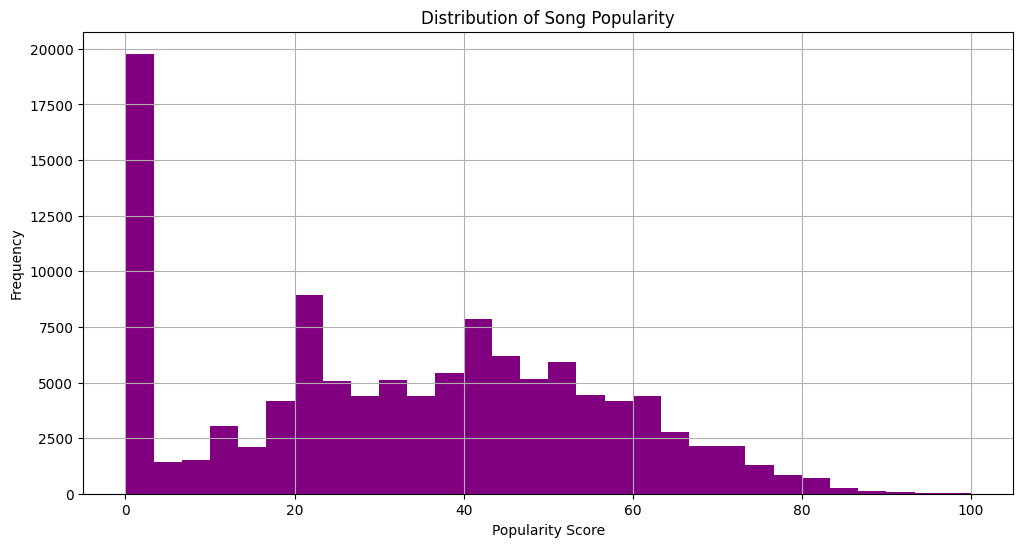

In [6]:
plt.figure(figsize=(12,6))
df["popularity"].hist(bins=30, color="purple")
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()

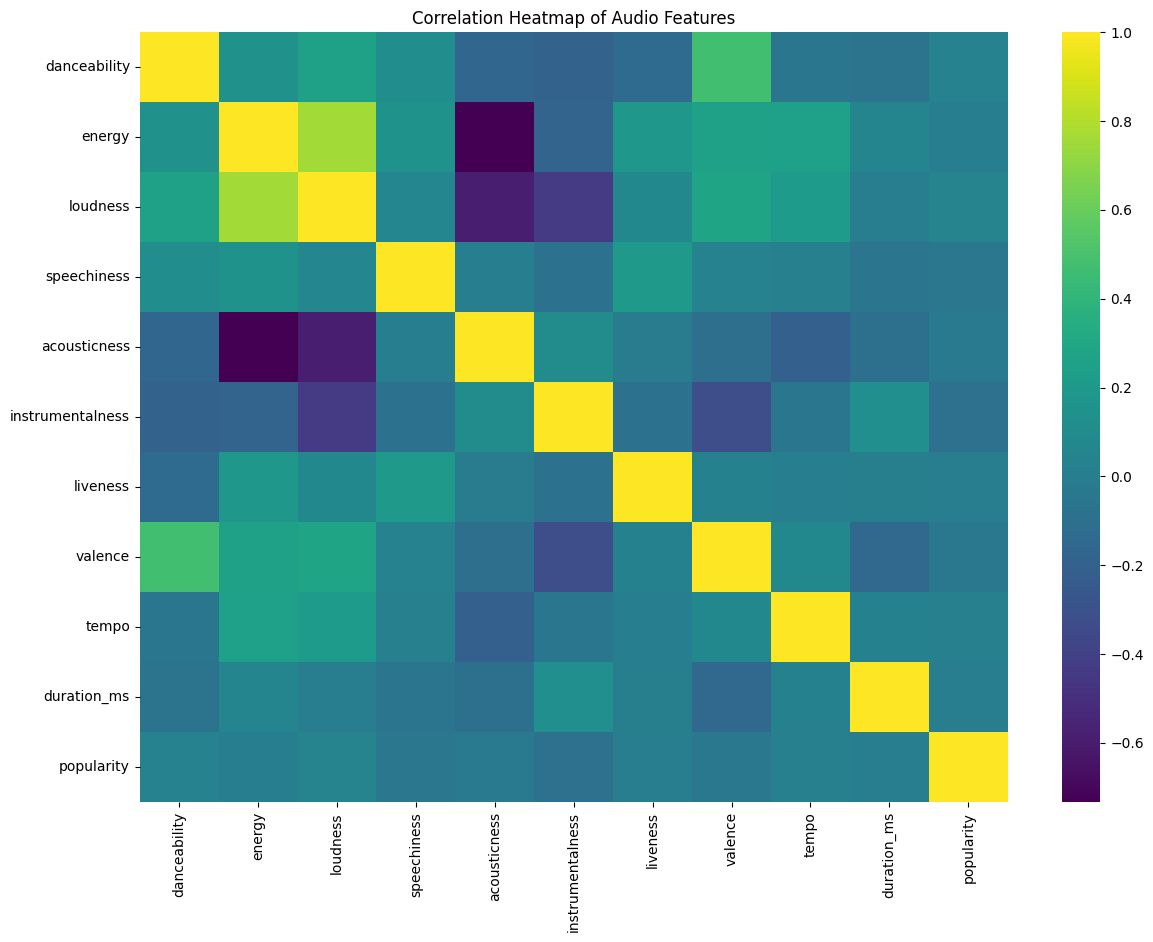

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(df[features + ["popularity"]].corr(), annot=False, cmap="viridis")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

Decision Tree Classifier (3 Parameter Runs)

In [8]:
results_dt = {}

for depth in [3, 5, 8]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results_dt[f"max_depth={depth}"] = acc

results_dt


{'max_depth=3': 0.8706666666666667,
 'max_depth=5': 0.8704561403508771,
 'max_depth=8': 0.8709473684210526}

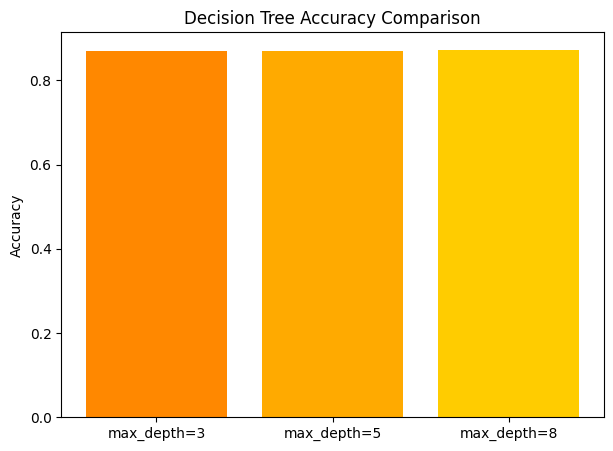

In [9]:
plt.figure(figsize=(7,5))
plt.bar(results_dt.keys(), results_dt.values(), color=["#ff8800", "#ffaa00", "#ffcc00"])
plt.title("Decision Tree Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


Random Forest Classifier (3 Parameter Runs)

In [10]:
results_rf = {}

for n in [50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results_rf[f"n_estimators={n}"] = acc

results_rf


{'n_estimators=50': 0.9291228070175439,
 'n_estimators=100': 0.9294035087719298,
 'n_estimators=200': 0.9296842105263158}

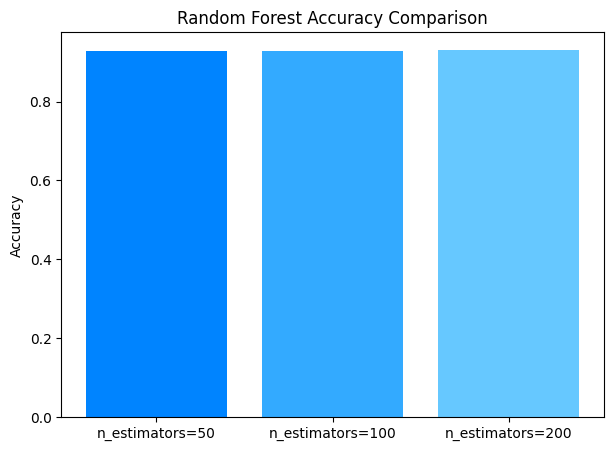

In [11]:
plt.figure(figsize=(7,5))
plt.bar(results_rf.keys(), results_rf.values(), color=["#0084ff", "#33aaff", "#66c8ff"])
plt.title("Random Forest Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


Linear Regression (Popularity Score Prediction)

In [12]:
lr = LinearRegression()
lr.fit(X_train_scaled, df.loc[X_train.index, "popularity"])
pred_lr = lr.predict(X_test_scaled)


In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df.loc[X_test.index, "popularity"], pred_lr)
rmse = mse ** 0.5
rmse


22.015770786189858

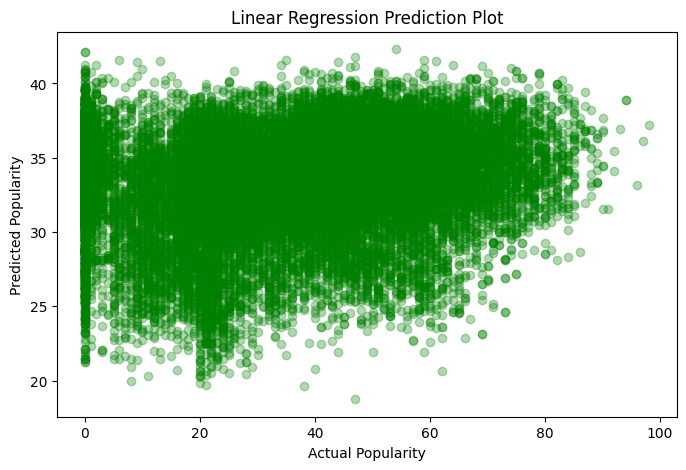

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df.loc[X_test.index, "popularity"], pred_lr, alpha=0.3, color="green")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Linear Regression Prediction Plot")
plt.show()


K-Means Clustering (k = 2, 3, 4)

In [16]:
cluster_scores = {}

for k in [2, 3, 4]:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    cluster_scores[f"k={k}"] = km.inertia_

cluster_scores


{'k=2': 919450.3109849361, 'k=3': 843611.0647733588, 'k=4': 768178.8298519866}

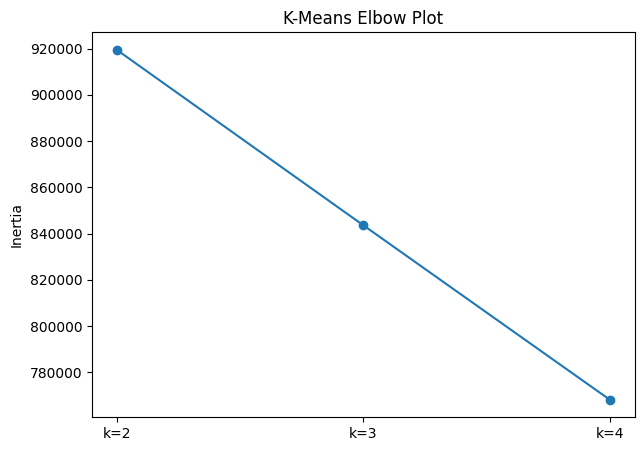

In [17]:
plt.figure(figsize=(7,5))
plt.plot(cluster_scores.keys(), cluster_scores.values(), marker="o")
plt.title("K-Means Elbow Plot")
plt.ylabel("Inertia")
plt.show()


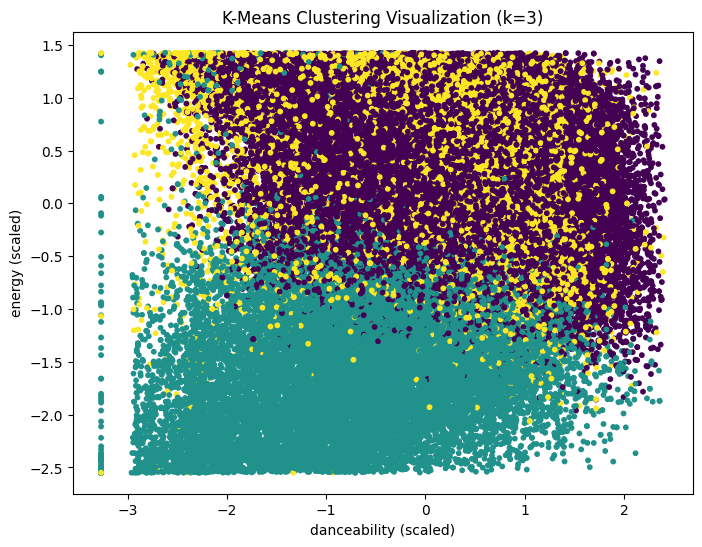

In [18]:
km3 = KMeans(n_clusters=3, random_state=42)
clusters = km3.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap="viridis", s=10)
plt.title("K-Means Clustering Visualization (k=3)")
plt.xlabel("danceability (scaled)")
plt.ylabel("energy (scaled)")
plt.show()


Rule-Based Mini Classification Tool

In [19]:
def classify_song(danceability, energy, acousticness):
    if energy > 0.65 and danceability > 0.60:
        return "Hit Song"
    if energy < 0.40 and acousticness > 0.60:
        return "Not a Hit"
    return "Maybe a Hit"


3 User Interaction Runs

In [20]:
classify_song(0.72, 0.80, 0.10)


'Hit Song'

In [21]:
classify_song(0.40, 0.35, 0.75)


'Not a Hit'

In [22]:
classify_song(0.55, 0.50, 0.25)


'Maybe a Hit'

### Conclusions

- Random Forest gives the highest and most stable accuracy.
- Decision Tree improves with higher depth but still underperforms compared to ensemble models.
- Linear Regression shows moderate error; audio features alone cannot fully predict popularity.
- K-Means (k=3) forms meaningful clusters: high-energy, acoustic, mixed tracks.
- Clusters overlap, indicating smooth transitions in song characteristics.
- Overall: Random Forest = Best model; Regression = limited; Clustering = useful insight.
- Project successfully applies classification, regression, clustering, and rule-based prediction.
